# **Solar Farm Insight**

Exploratory Data Analysis (`EDA`) for MoonLight Energy Solutions to identify optimal locations for solar farm installations, focusing on sustainability and operational efficiency through data-driven insights.

### **Install Dependencies**

In [1]:
!pip3 install -r ../requirements/local.txt -qqq

### **Import Libraries**

In [2]:

# Set the path to the parent directory
import sys
import pathlib

import pandas as pd

sys.path.append("..")

from scripts.setup_data import extract_data
from notebooks.utils import plot_statistical_summary

## **Dataset Overview**
The dataset provides time-series data to analyze solar energy potential and environmental conditions, aiding in site selection for solar farm installations.

In [3]:
# Dataset path
RAW_DATASET_PATH = pathlib.Path("../data/data.zip")
EXTRACTION_OUTPUT_PATH = RAW_DATASET_PATH.parent.parent

DATASET_PATH = RAW_DATASET_PATH.parent

### **Extract dataset**

In [4]:
# Extract the data
extract_data(RAW_DATASET_PATH, EXTRACTION_OUTPUT_PATH)

# Verify intallation
print(*list((EXTRACTION_OUTPUT_PATH / "data").glob("*.csv")), sep="\n")

../data/sierraleone-bumbuna.csv
../data/togo-dapaong_qc.csv
../data/benin-malanville.csv


### **Load the dataset**

In [5]:
# Load Benin data
bn_df = pd.read_csv(
    DATASET_PATH / "benin-malanville.csv", parse_dates=["Timestamp"], index_col="Timestamp"
)

# Load Sierraleone data
sl_df = pd.read_csv(
    DATASET_PATH / "sierraleone-bumbuna.csv", parse_dates=["Timestamp"], index_col="Timestamp"
)

# Load Togo data
tg_df = pd.read_csv(
    DATASET_PATH / "togo-dapaong_qc.csv", parse_dates=["Timestamp"], index_col="Timestamp"
)

In [6]:
print("Benin:", bn_df.shape)
bn_df.head()

Benin: (525600, 18)


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
Timestamp,,,,,,,,,,,,,,,,,,
2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [7]:
print("Sierra Leone:", sl_df.shape)
sl_df.head()

Sierra Leone: (525600, 18)


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
Timestamp,,,,,,,,,,,,,,,,,,
2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [8]:
print("Togo:", tg_df.shape)
tg_df.head()

Togo: (525600, 18)


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
Timestamp,,,,,,,,,,,,,,,,,,
2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


## **Exploratory Data Analysis (`EDA`)**

Performing Exploratory Data Analysis (EDA) analysis to understand the dataset and identify patterns, trends, and relationships between variables.

### **Summary Statistics**

In [9]:
# Understand the Timestamp organization
print(bn_df.index.min(), bn_df.index.max(), sep=" || ")
print(sl_df.index.min(), sl_df.index.max(), sep=" || ")
print(tg_df.index.min(), tg_df.index.max(), sep=" || ")

2021-08-09 00:01:00 || 2022-08-09 00:00:00
2021-10-30 00:01:00 || 2022-10-30 00:00:00
2021-10-25 00:01:00 || 2022-10-25 00:00:00


#### **Benin Solar Farm**

In [10]:
# Describe the data
bn_df.describe(exclude=["datetime64"])

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [11]:
bn_df.index

DatetimeIndex(['2021-08-09 00:01:00', '2021-08-09 00:02:00',
               '2021-08-09 00:03:00', '2021-08-09 00:04:00',
               '2021-08-09 00:05:00', '2021-08-09 00:06:00',
               '2021-08-09 00:07:00', '2021-08-09 00:08:00',
               '2021-08-09 00:09:00', '2021-08-09 00:10:00',
               ...
               '2022-08-08 23:51:00', '2022-08-08 23:52:00',
               '2022-08-08 23:53:00', '2022-08-08 23:54:00',
               '2022-08-08 23:55:00', '2022-08-08 23:56:00',
               '2022-08-08 23:57:00', '2022-08-08 23:58:00',
               '2022-08-08 23:59:00', '2022-08-09 00:00:00'],
              dtype='datetime64[ns]', name='Timestamp', length=525600, freq=None)

/home/scorpion/Education/10Academy/Week0/sfi/notebooks/../notebooks/utils.py:70: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the legend


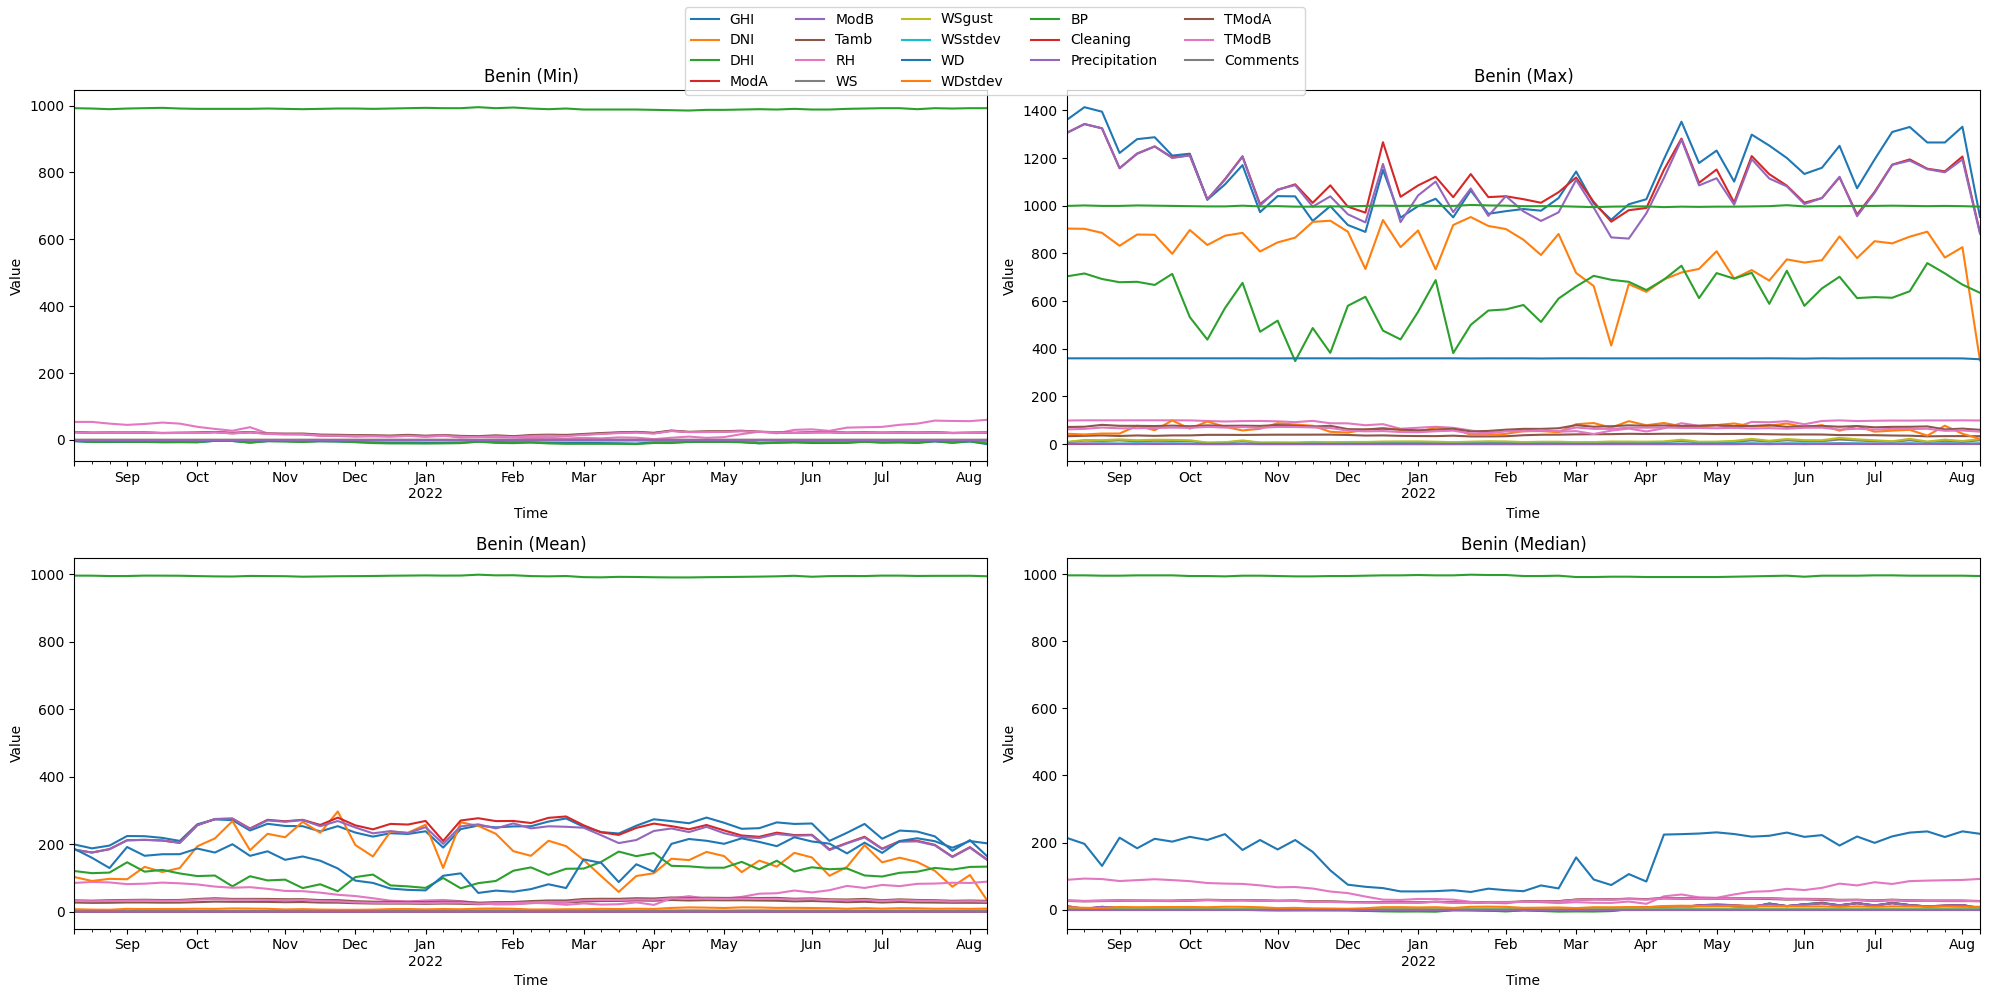

In [12]:
plot_statistical_summary(
    dataframe=bn_df,
    resample_period="1W",
    aggregation_methods=["min", "max", "mean", "median"],
    xlabel="Time",
    ylabel="Value",
    title="Benin",
    figsize=(20, 5),
)

#### **Sierra Leone Solar Farm**

In [13]:
# Describe the data
sl_df.describe(exclude=["datetime64"])

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


/home/scorpion/Education/10Academy/Week0/sfi/notebooks/../notebooks/utils.py:70: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the legend


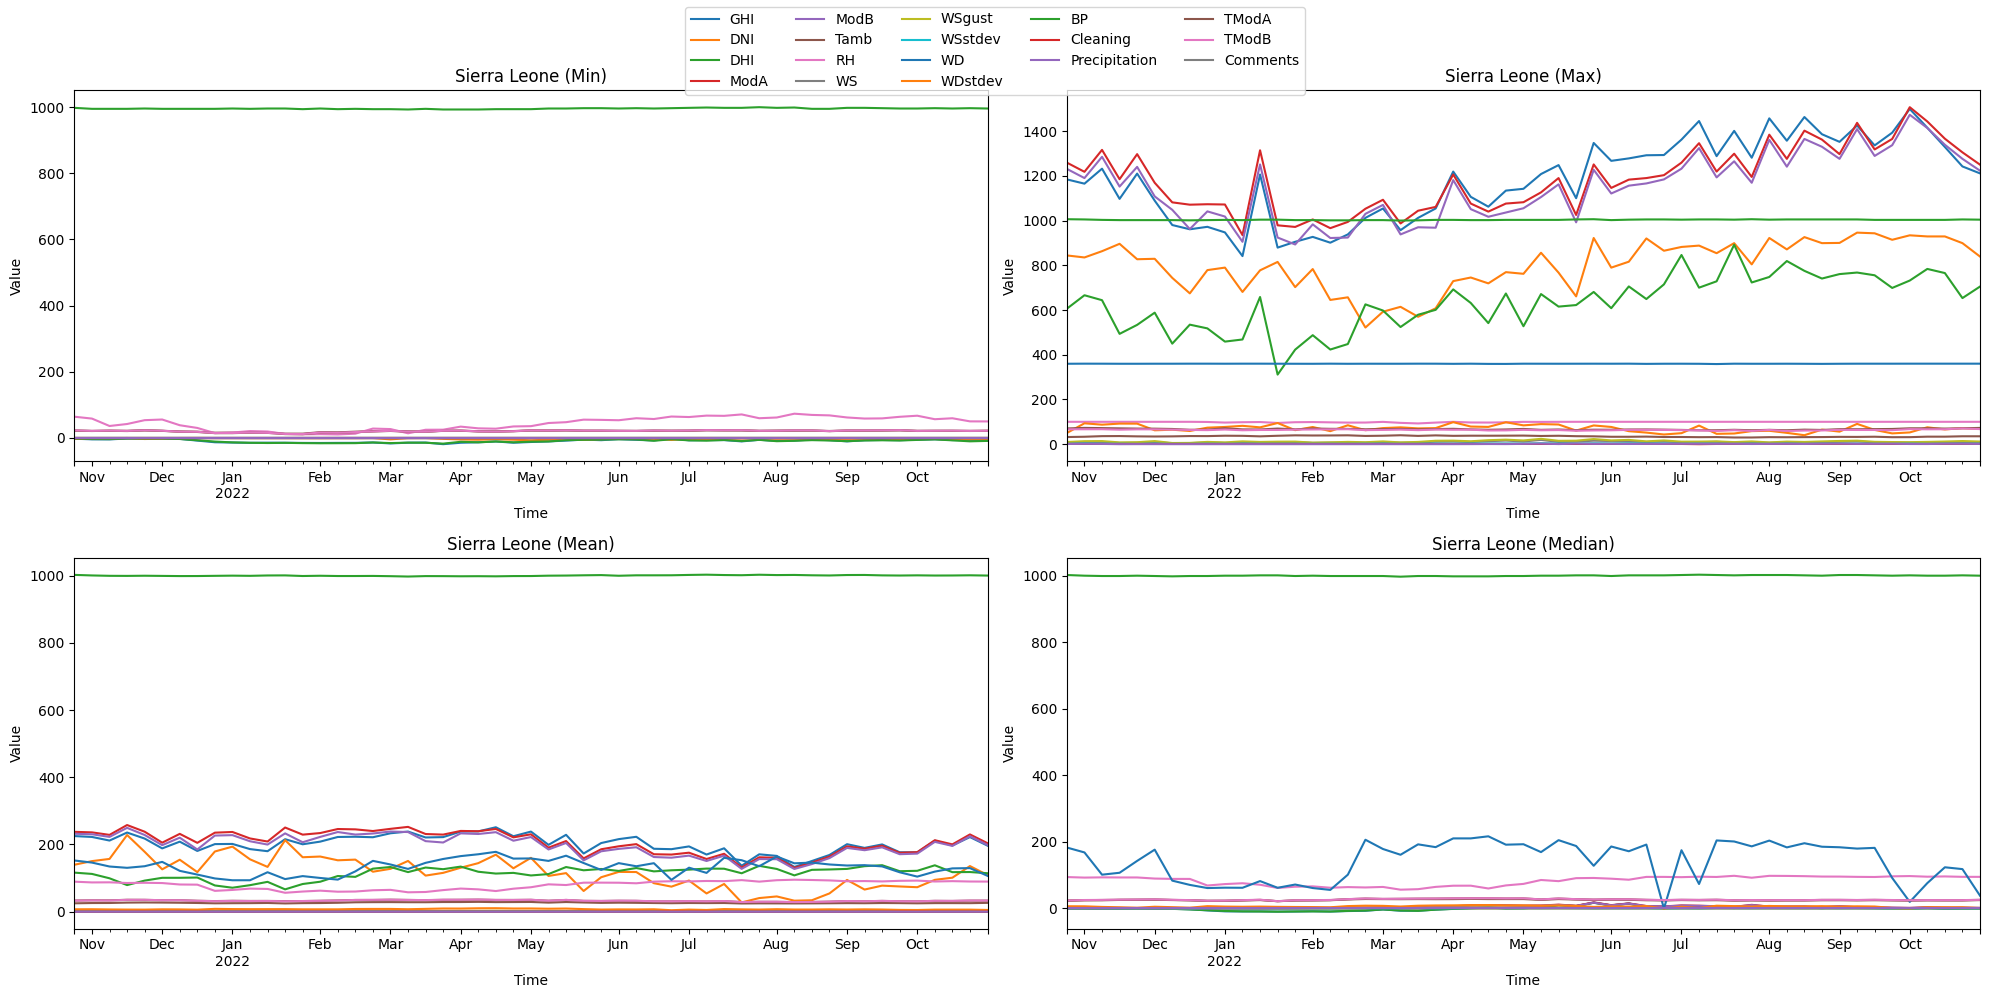

In [14]:
plot_statistical_summary(
    dataframe=sl_df,
    resample_period="1W",
    aggregation_methods=["min", "max", "mean", "median"],
    xlabel="Time",
    ylabel="Value",
    title="Sierra Leone",
    figsize=(20, 5),
)

#### **Togo Solar Farm**

In [15]:
# Describe the data
tg_df.describe(exclude=["datetime64"])

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


/home/scorpion/Education/10Academy/Week0/sfi/notebooks/../notebooks/utils.py:70: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the legend


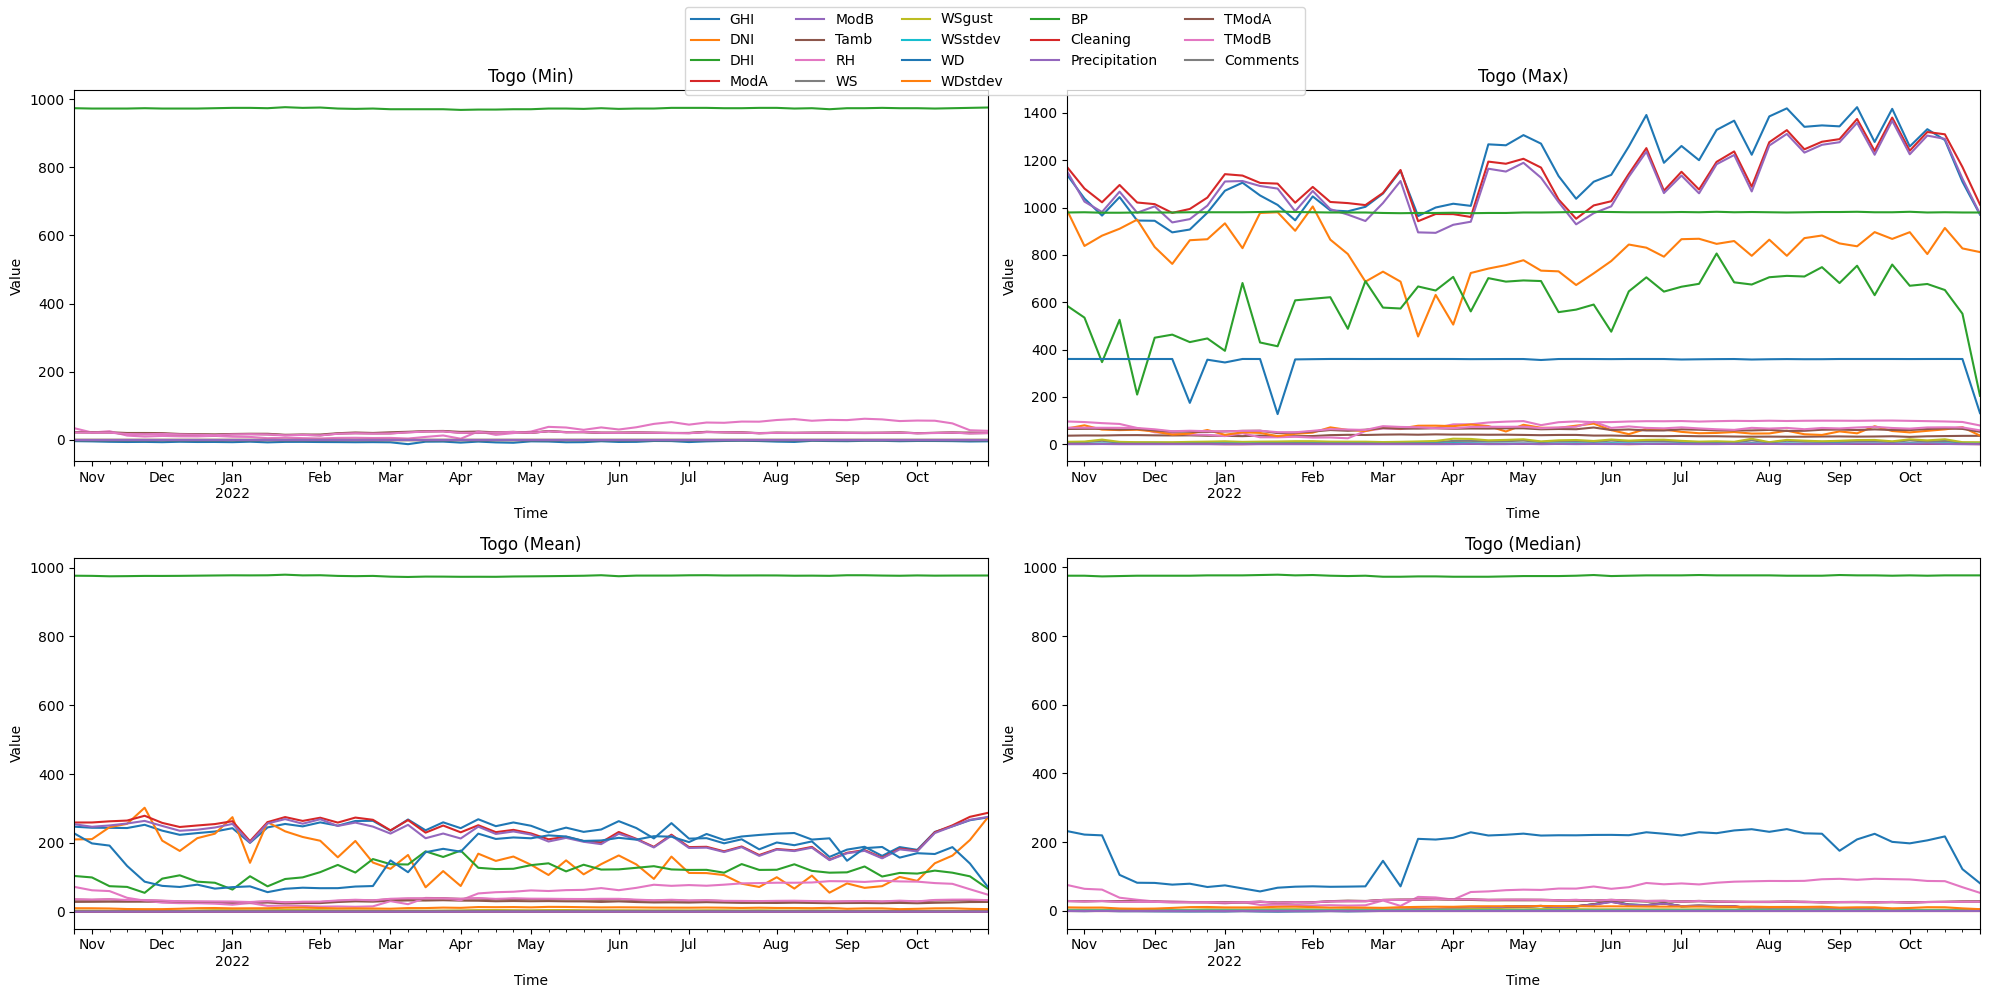

In [16]:
plot_statistical_summary(
    dataframe=tg_df,
    resample_period="1W",
    aggregation_methods=["min", "max", "mean", "median"],
    xlabel="Time",
    ylabel="Value",
    title="Togo",
    figsize=(20, 5),
)